In [ ]:
!pip install wikipedia
!pip install seaborn

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=76903ad1b7755aa57e1df055cc644fa25671d7412009df86858643ed749b2902
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
import wikipedia
import re
import spacy
import spacy.cli
spacy.cli.download("es_core_news_md")
nlp = spacy.load('es_core_news_md')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from pprint import pprint
from lxml import html
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import sklearn
import pandas as pd
import numpy as np
from urllib.parse import urljoin

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.manifold import TSNE
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from io import BytesIO
from requests.exceptions import RequestException

La IA de chatGPT, utilizando información de Wikipedia, ha seleccionado a un grupo de políticos latinoamericanos que se consideran como los más representativos de los últimos años. Algunos de los seleccionados son Jair Bolsonaro, Gustavo Petro, Gabriel Boric, Andrés Manuel López Obrador, Leopoldo López, Juan Guaidó, Cristina Kirchner, Salvador Allende, Hugo Chávez y Fidel Castro. Este análisis ofrece una mirada interesante a los líderes que han marcado el panorama político de Latinoamérica, pero es importante recordar que no es exhaustivo y que la selección de políticos es solo una aproximación. Luego se extrajo la información de la biografía de cada uno de los 40 políticos de wikipedia.

In [ ]:
# Establecer la sesión de Wikipedia
wikipedia.set_lang("es")

# Obtener una lista de personajes latinoamericanos
politicians = [
    "Luis_Inácio_Lula_da_Silva","Cristina_Fernández_de_Kirchner","Simón_Bolívar","José_de_San_Martín",
    "Fidel_Castro","Che_Guevara","Salvador_Allende","Augusto_Pinochet","Juan_Domingo_Perón","Eva_Perón",
    "Hugo_Chávez","Nicolás_Maduro","Dilma_Rousseff","Jair_Bolsonaro","Alberto_Fujimori","Pedro_Castillo",
    "Evo_Morales","Jeanine_Áñez","Gabriel_Boric","Michelle_Bachelet","Ernesto_Samper","Álvaro_Uribe_Vélez",
    "Juan_Manuel_Santos","Gustavo_Petro","José_Mujica","Tabaré_Vázquez","Daniel_Ortega","Violeta_Chamorro",
    "Manuel_Antonio_Noriega","Rafael_Correa","Lenín_Moreno","Guillermo_Lasso","Enrique_Peña_Nieto",
    "Andrés_Manuel_López_Obrador","Vicente_Fox","Felipe_Calderón","Carlos_Salinas_de_Gortari",
    "Alejandro_Toledo","Ollanta_Humala","Luis_Arce"
]

# Obtener los textos de los personajes
biografias = [wikipedia.page(politician).content for politician in politicians]

In [ ]:
base_url = 'https://upload.wikimedia.org'

In [ ]:
images = []
for politician in politicians:
    try:
        # Obtén el contenido de la página de Wikipedia
        page = wikipedia.page(politician)
        html_content = requests.get(page.url).content
        # Analiza el contenido HTML usando BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        # Busca la tabla de información; usa 'infobox' como clase general
        table = soup.find('table', class_='infobox')
        if not table:
            print(f"No se encontró infobox para {politician}")
            continue
        # Encuentra la primera imagen en la tabla
        image = table.find('img')
        if not image:
            print(f"No se encontró imagen en infobox para {politician}")
            continue
        # Obtén la URL de la imagen
        image_url = image.get('src')
        # Convierte la URL relativa en absoluta
        absolute_image_url = urljoin(base_url, image_url)
        images.append(absolute_image_url)
        # Aquí agregarías el código para descargar la imagen
    except Exception as e:
        print(f"Se produjo un error al procesar la página de {politician}: {e}")
print(images)

['https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Foto_oficial_de_Luiz_In%C3%A1cio_Lula_da_Silva_%28estreita%29.jpg/220px-Foto_oficial_de_Luiz_In%C3%A1cio_Lula_da_Silva_%28estreita%29.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Cristina_Fern%C3%A1ndez_de_Kirchner_2011-12-10.jpg/220px-Cristina_Fern%C3%A1ndez_de_Kirchner_2011-12-10.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Sim%C3%B3n_Bol%C3%ADvar._Toro_Moreno%2C_Jos%C3%A9._1922%2C_Legislative_Palace%2C_La_Paz.png/220px-Sim%C3%B3n_Bol%C3%ADvar._Toro_Moreno%2C_Jos%C3%A9._1922%2C_Legislative_Palace%2C_La_Paz.png', 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Jos%C3%A9_de_San_Mart%C3%ADn_%28retrato%2C_c.1828%29.jpg/220px-Jos%C3%A9_de_San_Mart%C3%ADn_%28retrato%2C_c.1828%29.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Fidel_Castro_2012.jpg/220px-Fidel_Castro_2012.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Che_Guevara_-_Guerrillero_Her

In [ ]:
biografias[0]

'Luiz Inácio Lula da Silva (registrado al nacer como Luiz Inácio da Silva; Garanhuns, 27 de octubre de 1945), más conocido como Lula da Silva o simplemente Lula (), es un sindicalista y político progresista[2]\u200b brasileño, antiguo trabajador metalúrgico,[3]\u200b y actual presidente de la República Federativa de Brasil, cargo que asumió el 1 de enero de 2023. \nMiembro fundador y presidente honorario del Partido de los Trabajadores, Lula obtuvo la victoria en las elecciones de 2002, y fue investido presidente el 1 de enero de 2003. En las elecciones de 2006 venció otra vez y obtuvo un segundo mandato como presidente, el cual finalizó el 1 de enero de 2011.[4]\u200b[5]\u200bMás de una década después, fue nuevamente elegido tras vencer en las elecciones de 2022 en la segunda vuelta contra el entonces presidente Jair Bolsonaro, convirtiéndose en la primera persona en ser electa tres veces para el cargo en la historia de su país.\nDe origen humilde, Lula fue obrero metalúrgico y sindic

In [ ]:
# Función de preprocesamiento y limpieza del texto
def limpiar_y_procesar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'\s+', ' ', texto)  # Eliminar espacios extras
    texto = re.sub(r'https?://\S+|www\.\S+', ' ', texto)  # Eliminar URLs
    texto = re.sub(r'[^a-z\sáéíóúñ]', ' ', texto)  # Preservar solo palabras  (fechas)
    doc = nlp(texto)
    # Lematización y eliminación de stopwords
    texto_limpio = ' '.join([token.lemma_ for token in doc if token.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV'] and token.text!="político"])
    return texto_limpio

In [ ]:
# Extraer y limpiar el contenido de cada URL
biografias_limpias = [limpiar_y_procesar_texto(biografia) for biografia in biografias]

In [ ]:
biografias_limpias[0]

'luiz inácio lula dar registrado nacer inácio dar garanhuns octubre más conocido lula dar simplemente lula sindicalista progresista brasileño antiguo trabajador metalúrgico actual presidente cargo asumir enero miembro fundador presidente honorario partido trabajador lula obtener victoria elección investir presidente enero elección vencer vez obtener segundo mandato presidente finalizar enero más década después nuevamente elegir vencer elección segundo vuelta entonces presidente bolsonaro convertir él primero persona electa vez cargo historia país origen humilde lula obrero metalúrgico sindicalista convertir él primero presidente obrero mediados década ocupar presidencia sindicato obrero metalurgia principal organizador mayor huelga dictadura militar poner jaque régimen acelerar caída candidato presidencia ocasión no hasta lograr obtener victoria primero año presidente hacer reforma radical cambio producir transformación social económico triplicar cápita banco mundial punto convertir re

# EMBEDDINGS

In [ ]:
import spacy.cli
spacy.cli.download("es_core_news_md")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import numpy as np
from sklearn.manifold import TSNE
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from requests.exceptions import RequestException

In [ ]:
# Generar representaciones basadas en embeddings

nlp = spacy.load('es_core_news_md')  # modelo de lenguaje mediano preentrenado para el español
biografias_embeddings = [nlp(biografia).vector for biografia in biografias]
biografias_embeddings_np = np.array(biografias_embeddings)


Este modelo ('es_core_news_md') texto en cursiva contiene vectores de palabras, así como varias capacidades para el procesamiento de texto como tokenización, etiquetado de partes del discurso, análisis de sintaxis

In [ ]:
tsne_model = TSNE(n_components=2, random_state=0)
biografias_tsne = tsne_model.fit_transform(biografias_embeddings_np)

In [ ]:
print("Forma de la matriz de embeddings:", biografias_embeddings_np.shape)

Forma de la matriz de embeddings: (40, 300)


In [ ]:
# Para ver algunos ejemplos de embeddings
for i in range(2):  # Muestra los primeros # embeddings
    print(f"Embedding {i+1}: {biografias_embeddings_np[i]}")
    print("Longitud del vector:", len(biografias_embeddings_np[i]))

Embedding 1: [ 1.13797140e+00  9.50205505e-01  4.02812153e-01 -3.62063795e-01
  1.53492022e+00 -9.62428376e-02  2.16373637e-01 -8.21781993e-01
 -1.09694287e-01  2.82019734e-01  3.22347939e-01  2.15753579e+00
  9.94995058e-01  3.14357609e-01 -1.22590017e+00 -4.60176449e-03
  8.06265950e-01  6.92534745e-01  5.42065322e-01  1.70356548e+00
  1.62414362e-04  4.90854114e-01 -7.01707363e-01  3.68877441e-01
 -3.47258538e-01  1.19603467e+00  4.17094976e-01  1.04933274e+00
 -2.06314698e-01 -1.27620602e+00  5.31268060e-01  1.95977181e-01
  4.17697877e-01  3.06622326e-01  9.64708552e-02 -1.37305260e+00
 -3.13957632e-01  1.87789083e-01  1.03870404e+00 -9.11392748e-01
 -1.91929340e-01  6.12280369e-01 -2.10636377e+00 -2.36874148e-01
 -9.95331705e-01  1.23071039e+00 -6.19761527e-01 -5.13859510e-01
 -9.60257888e-01  7.71240711e-01  1.14503086e+00 -1.80498689e-01
  5.09268761e-01  1.07089376e+00 -6.79861248e-01 -7.96277583e-01
 -4.17687416e-01  5.31095803e-01 -1.22203028e+00 -8.28383639e-02
 -3.35524052

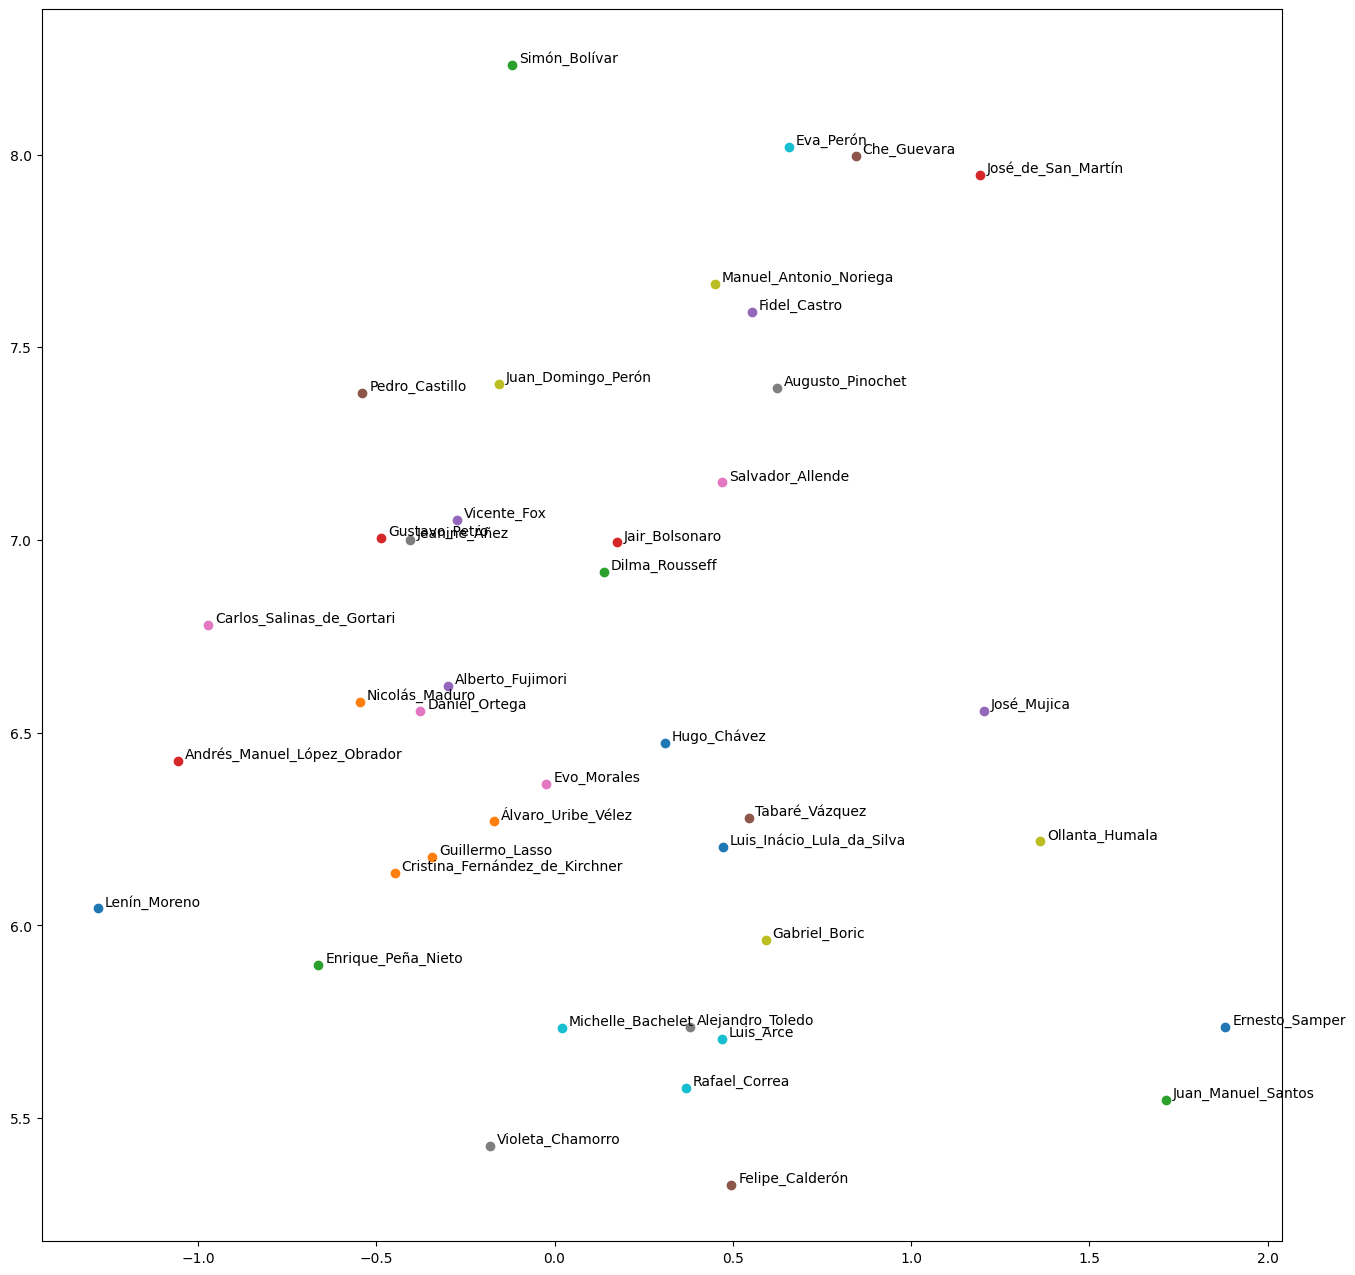

In [ ]:
# Visualización
plt.figure(figsize=(16, 16))
for i, label in enumerate(politicians):
    x, y = biografias_tsne[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

In [ ]:
import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.manifold import TSNE
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import os
import time
import requests
from PIL import Image
from io import BytesIO
import os
import time
import random

**DESCARGAR LAS IMAGENES **

In [ ]:

image_dir = '/content/ima'
os.makedirs(image_dir, exist_ok=True)


# Ajustar aquí el User-Agent
headers = {
    'User-Agent': 'NicoBot/0.1 (saritasuarez8028@gmail.com)'
}

for i, image_url in enumerate(images):
    # Asegúrate de que la URL comienza correctamente con 'https://'
    if not image_url.startswith('https://'):
        image_url = 'https:' + image_url

    try:
        # Descarga la imagen
        response = requests.get(image_url, headers=headers)
        response.raise_for_status()

        # Abre la imagen y la guarda en un archivo
        img = Image.open(BytesIO(response.content))
        img_path = f'{image_dir}/politico_{i}.jpg'
        img.save(img_path)
        print(f"Imagen guardada en: {img_path}")

        # Espera 2 segundos antes de hacer la próxima solicitud para evitar ser bloqueado
        time.sleep(2)
    except requests.HTTPError as e:
        print(f"HTTP Error al descargar la imagen de {image_url}: {e.response.status_code}")
    except requests.RequestException as e:
        print(f"Error al descargar la imagen de {image_url}: {e}")
    except IOError as e:
        print(f"IO Error al guardar la imagen {image_url}: {e}")

Imagen guardada en: /content/ima/politico_0.jpg
Imagen guardada en: /content/ima/politico_1.jpg
Imagen guardada en: /content/ima/politico_2.jpg
Imagen guardada en: /content/ima/politico_3.jpg
Imagen guardada en: /content/ima/politico_4.jpg
Imagen guardada en: /content/ima/politico_5.jpg
Imagen guardada en: /content/ima/politico_6.jpg
Imagen guardada en: /content/ima/politico_7.jpg
Imagen guardada en: /content/ima/politico_8.jpg
Imagen guardada en: /content/ima/politico_9.jpg
Imagen guardada en: /content/ima/politico_10.jpg
Imagen guardada en: /content/ima/politico_11.jpg
Imagen guardada en: /content/ima/politico_12.jpg
Imagen guardada en: /content/ima/politico_13.jpg
Imagen guardada en: /content/ima/politico_14.jpg
IO Error al guardar la imagen https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Pedro_Castillo_portrait.png/220px-Pedro_Castillo_portrait.png: cannot write mode RGBA as JPEG
Imagen guardada en: /content/ima/politico_16.jpg
Imagen guardada en: /content/ima/politico_17

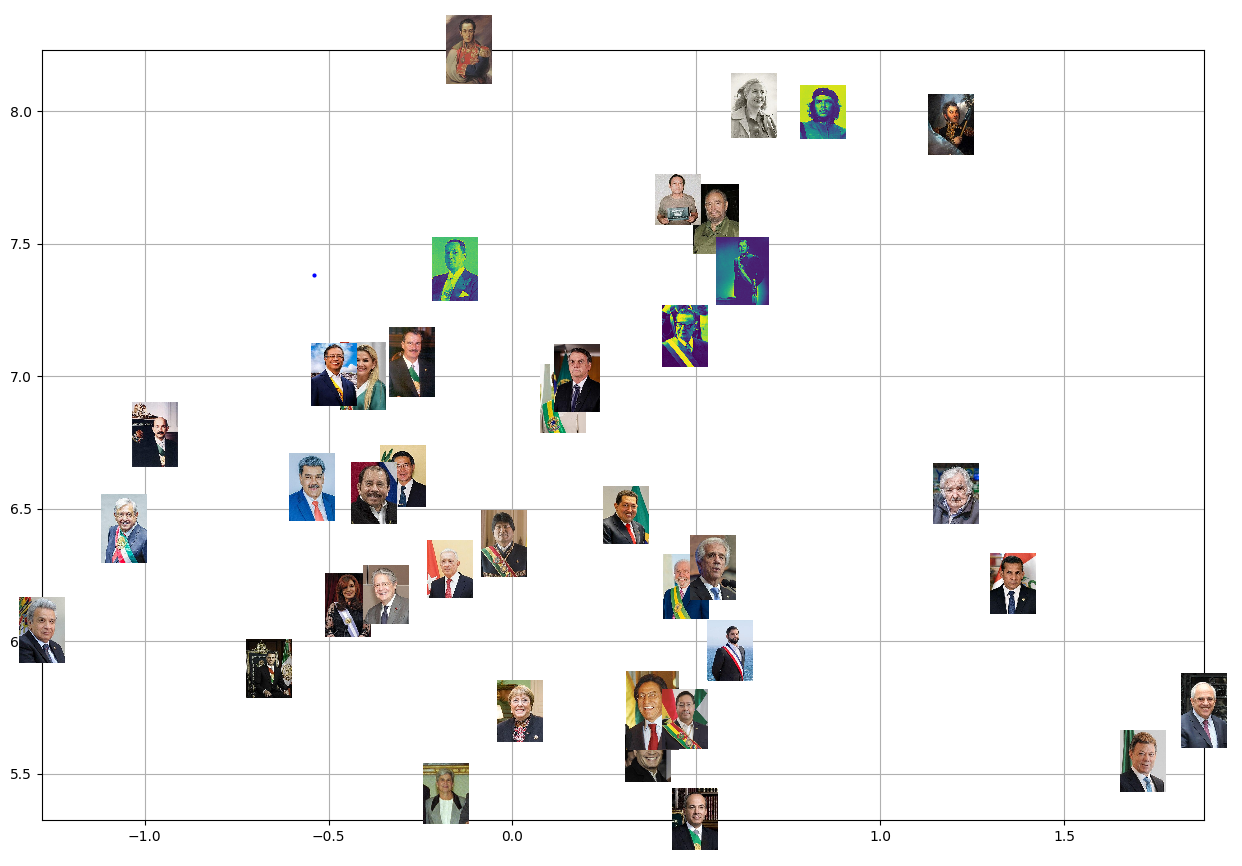

In [ ]:
# Inicializar el gráfico
fig, ax = plt.subplots(figsize=(15, 10))

# Obtener los límites máximos y mínimos de los ejes para el gráfico
x_min, x_max = np.min(biografias_tsne[:, 0]), np.max(biografias_tsne[:, 0])
y_min, y_max = np.min(biografias_tsne[:, 1]), np.max(biografias_tsne[:, 1])

# Configurar los límites del gráfico
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Colocar cada imagen en su posición correspondiente y dibujar un punto en el gráfico
for i in range(biografias_tsne.shape[0]):
    img_path = f'/content/ima/politico_{i}.jpg'
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        imagebox = OffsetImage(img, zoom=0.15)  #  ajustar el zoom
        ab = AnnotationBbox(imagebox, (biografias_tsne[i, 0], biografias_tsne[i, 1]), frameon=False)
        ax.add_artist(ab)
    # También dibujaremos un punto en la ubicación
    ax.plot(biografias_tsne[i, 0], biografias_tsne[i, 1], 'o', markersize=2, color='blue')

# Mostrar el gráfico
plt.grid(True)
plt.show()

 los políticos cuyas fotos están más cerca unos de otros tienen contenido semánticamente más parecido en sus biografías. Esto puede deberse a eventos comunes en los que estuvieron involucrados, políticas similares que promovieron o incluso el uso de una retórica parecida.

# TF-IDF

Este método asigna mayor importancia a las palabras que son más frecuentes en la biografía de un político y menos frecuentes en las biografías de otros, lo que ayuda a identificar los términos que mejor distinguen a un político de los demás. Se usa stopwords de español con la libreria nlkt

In [ ]:
nltk.download('stopwords')
stopword = list(stopwords.words('spanish'))
# Create a TF-IDF vectorizer
vec = TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words=stopword)
# Fit the vectorizer to the text documents and transform them into a matrix
tfidf = vec.fit_transform(biografias_limpias)
# Create a DataFrame from the matrix and apply a background gradient to the cells
df = pd.DataFrame(data = tfidf.todense(), columns = vec.get_feature_names_out()).style.background_gradient()
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Se representan tópicos con el fin de descubrir las ideas principales en las biografías de los políticos, analizar tendencias, comparar sus posiciones, agruparlos por afinidad ideológica y visualizar las relaciones entre tópicos y políticos.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
no_top_words = 10
nombreslda=vec.get_feature_names_out()
lda = LatentDirichletAllocation(n_components=9, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf)
display_topics(lda,nombreslda,no_top_words)

Topic 0:
residencia destacado financiero sistema violencia publicar comisión interno denominado exigir
Topic 1:
policía dilma comandante personalidad programa quedar paz orden honoris polémica
Topic 2:
igualdad industrial negar libro provincia latino aprobado designar época prohibir
Topic 3:
ofrecer rechazar perón expresión combatir institución comprometer dictador perder amplio
Topic 4:
arma ecuador blanco inversión postular importante declaración triunfo momento referéndum
Topic 5:
único víctima violación continuar desarrollo cumbre designar ver efectivo juicio
Topic 6:
petro fecha postura antiguo integrado fraude corrupción periodo práctica ubicado
Topic 7:
militar voto lula socialista condición ejército frente petro superar argentino
Topic 8:
fujimori económico reforma isla historia moneda trabajador tarde premio asistencia


In [ ]:
import seaborn as sns
import io
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

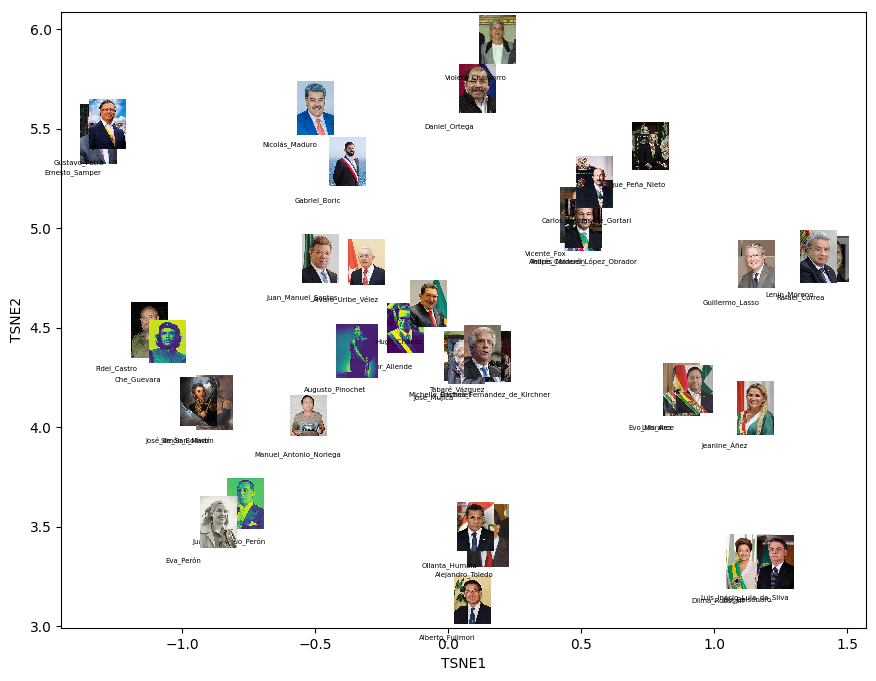

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(tfidf.toarray())
df_tsne = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne['Politician'] = politicians

fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 0.05])
ax = plt.subplot(gs[0])

sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Politician', legend=False, ax=ax)

for i in range(df_tsne.shape[0]):
    img_path = f'/content/ima/politico_{i}.jpg'
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        imagebox = OffsetImage(img, zoom=0.12)  #  ajustar el zoom
        ab = AnnotationBbox(imagebox, (df_tsne.iloc[i]['TSNE1'], df_tsne.iloc[i]['TSNE2']), frameon=False)
        ax.add_artist(ab)
        plt.text(df_tsne.iloc[i]['TSNE1']-0.2, df_tsne.iloc[i]['TSNE2']-0.2, df_tsne.iloc[i]['Politician'], color='black', fontsize=5)
plt.show()

Se observa una clara agrupación de los puntos por país. Los líderes de Colombia, Argentina, México y Venezuela se encuentran relativamente cerca entre sí.

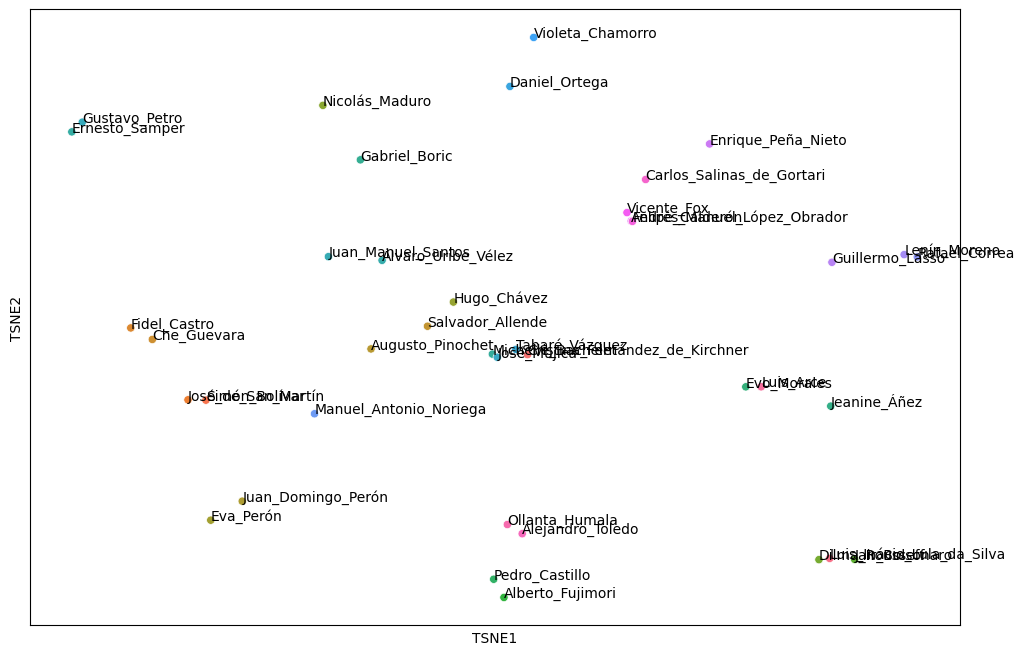

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(tfidf.toarray())
df_tsne = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne['Politician'] = politicians
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Politician', legend=False, ax=ax)

# Agregar texto a cada punto
for i, row in df_tsne.iterrows():
    ax.text(row['TSNE1'], row['TSNE2'], row['Politician'], color='Black', fontsize=10)

# Mostrar el gráfico
plt.xticks([])
plt.yticks([])
plt.show()